# Sembrando éxito: cómo el aprendizaje automático ayuda a los agricultores a seleccionar los mejores cultivos

![Farmer in a field](farmer_in_a_field.jpg)

Medir métricas esenciales del suelo, como los niveles de nitrógeno, fósforo, potasio y el valor del pH, es un aspecto importante de la evaluación del estado del suelo. Sin embargo, puede ser un proceso costoso y que requiere mucho tiempo, lo que puede hacer que los agricultores prioricen qué métricas medir en función de sus limitaciones presupuestarias.

Los agricultores tienen varias opciones a la hora de decidir qué cultivo plantar en cada temporada. Su principal objetivo es maximizar el rendimiento de sus cultivos, teniendo en cuenta diferentes factores. Un factor crucial que afecta el crecimiento de los cultivos es la condición del suelo en el campo, que puede evaluarse midiendo elementos básicos como los niveles de nitrógeno y potasio. Cada cultivo tiene una condición de suelo ideal que garantiza un crecimiento óptimo y un rendimiento máximo.

Un agricultor se acercó a usted como experto en aprendizaje automático para pedirle ayuda para seleccionar el mejor cultivo para su campo. Le proporcionaron un conjunto de datos llamado `soil_measures.csv`, que contiene:

- `"N"`: Relación de contenido de nitrógeno en el suelo
- `"P"`: Relación de contenido de fósforo en el suelo
- `"K"`: Relación de contenido de potasio en el suelo.
- Valor `"pH"` del suelo
- `"crop"`: valores categóricos que contienen varios cultivos (variable objetivo).

Cada fila de este conjunto de datos representa varias medidas del suelo en un campo en particular. Según estas mediciones, el cultivo especificado en la columna "cultivo" es la opción óptima para ese campo.

En este proyecto, aplicará el aprendizaje automático para construir un modelo de clasificación de clases múltiples para predecir el tipo de "cultivo", mientras utiliza técnicas para evitar la multicolinealidad, que es un concepto en el que dos o más características están altamente correlacionadas.

In [128]:
"1.-Determinar la cantidad de cultivos"
"2.-Verificar los valores faltantes"
"3.-Verificar que los datos en cada columna de características potenciales sean numéricos."

'3.-Verificar que los datos en cada columna de características potenciales sean numéricos.'

In [129]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

In [130]:
# Determinar la cantidad de cultivos
print(cantidad_cultivos := crops["crop"].nunique())

22


In [131]:
# Verificar los valores faltantes
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [132]:
# Verificar que los datos en cada columna de características potenciales sean numéricos
crops.drop(columns=["crop"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 68.9 KB


In [133]:
# Cambiando la columna objetivo a un dato numérico
dicc = {elemento:index for index, elemento in enumerate(crops["crop"].unique())}
crops.replace(dicc, inplace=True)

In [134]:
crops

,N,P,K,ph,crop
0,90,42,43,6.502985,0
1,85,58,41,7.038096,0
2,60,55,44,7.840207,0
3,74,35,40,6.980401,0
4,78,42,42,7.628473,0
...,...,...,...,...,...
2195,107,34,32,6.780064,21
2196,99,15,27,6.086922,21
2197,118,33,30,6.362608,21
2198,117,32,34,6.758793,21


In [135]:
#Entrenar por cada caracteristica

y = crops["crop"].values

for column in crops.drop(columns=["crop"]).columns:
    X = crops[[column]].values  # Asegúrate de pasar la columna como un DataFrame
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression(max_iter=2000, multi_class="multinomial")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='weighted')  # Puedes ajustar el promedio según tus necesidades
    
    print(f"F1 Score for {column}: {f1:.4f}")


F1 Score for N: 0.1073
F1 Score for P: 0.1282
F1 Score for K: 0.2196
F1 Score for ph: 0.0453


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


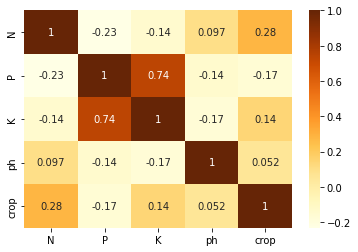

In [136]:
#Correlacion
sns.heatmap(crops.corr(), annot= True, cmap="YlOrBr")
plt.show()

In [138]:
#Modelo Completo
X = crops.drop(columns=["P", "crop"]).values
y = crops["crop"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=5000, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
    
f1 = f1_score(y_test, y_pred, average='weighted')  # Puedes ajustar el promedio según tus necesidades
    
print(f"F1: {f1:.4f}")



F1: 0.5810


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
